<a href="https://colab.research.google.com/github/Anagha-dsa/Data.science/blob/main/anagha_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study on Regression**

**The  given dataset contains price of second-hand Hyundai grand i10 car with
respect to year of making. Find the best linear relationship between year and
price. Can you predict the possible price of a 2022 model second-hand grand i10?
Please learn about lasso regression and create a model along with linear
regression. Find out which one is performing better.**



In [4]:
# import neccesary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# choose the file to be uploaded
data = pd.read_csv('/content/car_age_price.csv')

In [34]:
# print first few rows
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
5,2015,350000
6,2016,425000
7,2017,575000
8,2017,509999
9,2017,575000


In [7]:
# dimension of data
data.shape

(112, 2)

In [8]:
# Check for missing values
data.isna().sum()

,0
Year,0
Price,0


In [9]:
# check data type of columns and number of entries in each
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [10]:
#  shows descriptive statistics
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


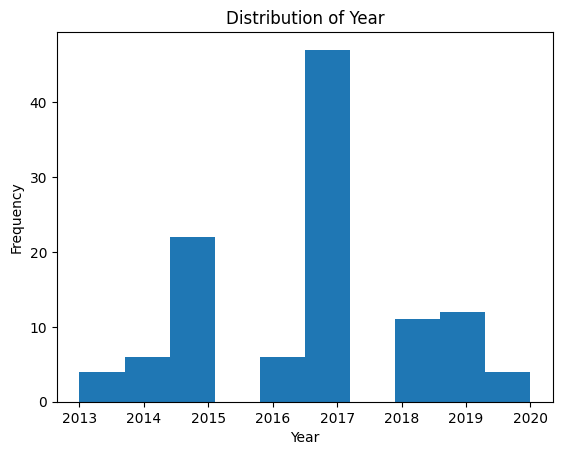

In [11]:
# neccesary visualisation code using matplotlib

plt.hist(data['Year'])
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Year')
plt.show()

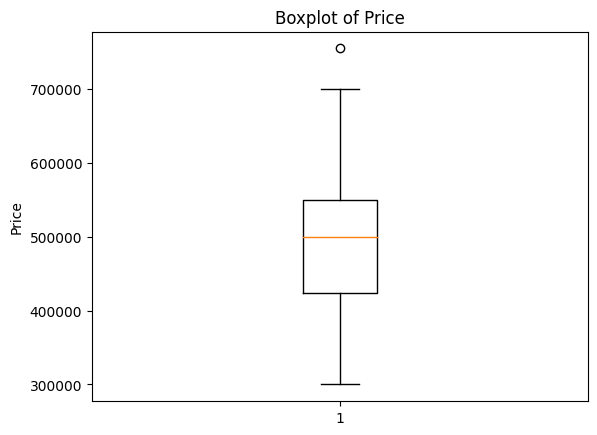

In [12]:
# boxplot helps to visualize the potential outliers

plt.boxplot(data['Price'])
plt.ylabel('Price')
plt.title('Boxplot of Price')
plt.show()


In [19]:
# outlier treatment

Q1 =data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

data1 =data[(data['Price'] >= lower_bound) & (data['Price'] <= upper_bound)]

print("Shape of DataFrame without outliers:", data1.shape)

Shape of DataFrame without outliers: (111, 2)


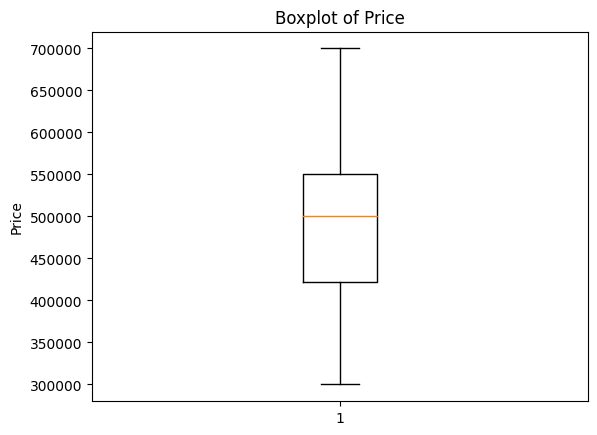

In [18]:
# boxplot after outlier treatment

plt.boxplot(data1['Price'])
plt.ylabel('Price')
plt.title('Boxplot of Price')
plt.show()


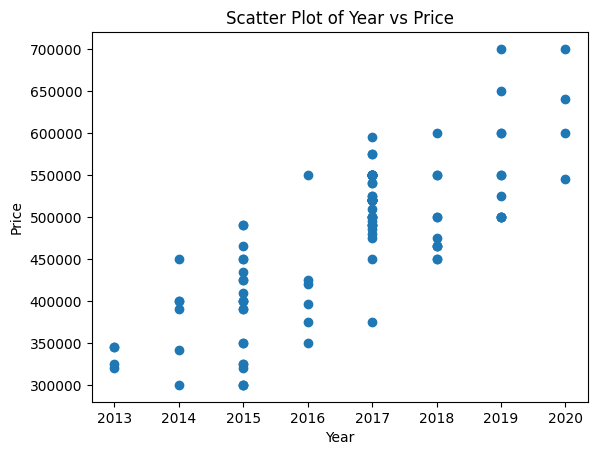

In [21]:
plt.scatter(data1['Year'], data1['Price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Scatter Plot of Year vs Price')
plt.show()


In [22]:
# Prepare the data
X = data1[['Year']]
y = data1['Price']

In [23]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# linear regression

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
linear_predictions = linear_model.predict(X_test)

In [25]:
# Lasso regression

from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)

In [28]:
# Evaluate the models

from sklearn.metrics import mean_squared_error, r2_score
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)

print("Linear Regression - MSE:", linear_mse, "R-squared:", linear_r2)
print("Lasso Regression - MSE:", lasso_mse, "R-squared:", lasso_r2)

Linear Regression - MSE: 2360736941.0488067 R-squared: 0.7087665874512326
Lasso Regression - MSE: 2360738206.8636756 R-squared: 0.7087664312933915


In [29]:
# Predict the price of a 2022 model
new_data = pd.DataFrame({'Year': [2022]})
linear_prediction_2022 = linear_model.predict(new_data)
lasso_prediction_2022 = lasso_model.predict(new_data)

print("Linear Regression - Predicted price for 2022 model:", linear_prediction_2022[0])
print("Lasso Regression - Predicted price for 2022 model:", lasso_prediction_2022[0])

Linear Regression - Predicted price for 2022 model: 704536.2326783836
Lasso Regression - Predicted price for 2022 model: 704536.0188210905


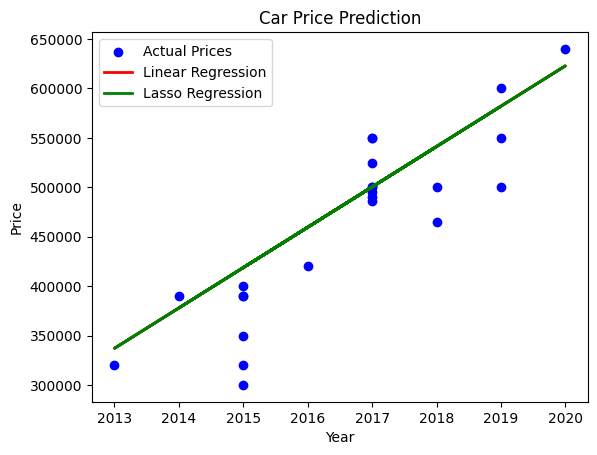

In [30]:
# Visualize the results
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, linear_predictions, color='red', linewidth=2, label='Linear Regression')
plt.plot(X_test, lasso_predictions, color='green', linewidth=2, label='Lasso Regression')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Car Price Prediction')
plt.legend()
plt.show()


In [31]:
# Determine the better performing model
if linear_r2 > lasso_r2:
    print("Linear Regression performs slightly better.")
elif lasso_r2 > linear_r2:
    print("Lasso Regression performs slightly better.")
else:
    print("Both models perform similarly.")

Linear Regression performs slightly better.
